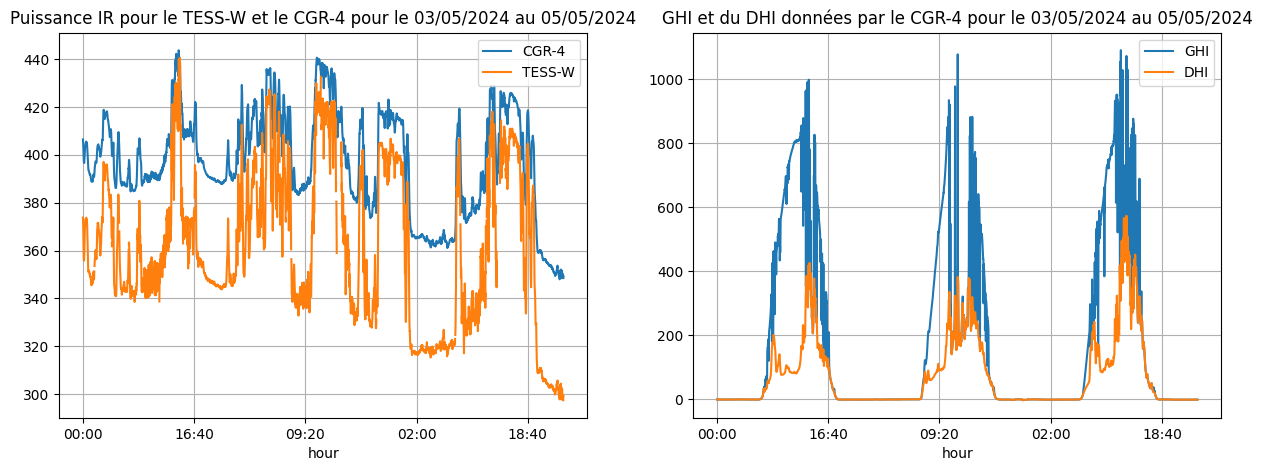

MAE : 35.42623557036259
RMSE : 37.316836357919584
MedAE: 40.404164060474955


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *
import locale

# Définir la locale en français pour les noms des mois
locale.setlocale(locale.LC_TIME, 'fr_FR.UTF-8')

# Charger le fichier CSV
df = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier csv/TESS-W CGR-4 03-05 10-05 filtré.csv", delimiter=';')

# Convertir la colonne 'day' en type datetime
df['day'] = pd.to_datetime(df['day'], format='%d/%m/%Y')

index = df.set_index(df['hour'], inplace=True)

# Fonction pour tracer les graphiques en fonction de la date spécifiée
def plot_graph(date_range, single_date=False, is_month=False, separate_days=False):
    if separate_days:
        for date in date_range:
            filtered_data = df[df['day'] == date]
            P_tsky = 5.670374 * 10 ** -8 * (filtered_data['tsky'] + 273) ** 4
            P_tskynan = 5.670374 * 10 ** -8 * (filtered_data.dropna()['tsky'] + 273) ** 4

            fig, ax1 = plt.subplots(1, 2, figsize=(15, 5))

            filtered_data['IR 1'].plot(ax=ax1[0], label='CGR-4')
            P_tsky.plot(ax=ax1[0], label='TESS-W')
            ax1[0].set_title('Puissance IR pour le TESS-W et le CGR-4 pour le {}'.format(date.strftime('%d/%m/%Y')))

            filtered_data['GHI'].plot(ax=ax1[1], label='GHI')
            filtered_data['DHI'].plot(ax=ax1[1], label='DHI')
            ax1[1].set_title('GHI et du DHI données par le CGR-4 pour le {}'.format(date.strftime('%d/%m/%Y')))

            ax1[0].legend()
            ax1[0].grid()
            ax1[1].legend()
            ax1[1].grid()

            plt.show()

            # Calcul des métriques d'erreur
            print('MAE :', mean_absolute_error(filtered_data.dropna()['IR 1'], P_tskynan))
            print('RMSE :', np.sqrt(mean_squared_error(filtered_data.dropna()['IR 1'], P_tskynan)))
            print('MedAE:', median_absolute_error(filtered_data.dropna()['IR 1'], P_tskynan))

    else:
        fig, ax1 = plt.subplots(1, 2, figsize=(15, 5))

        # Filtrer les données en fonction de la plage de dates spécifiée
        filtered_data = df[df['day'].isin(date_range)]

        P_tsky = 5.670374 * 10 ** -8 * (filtered_data['tsky'] + 273) ** 4
        P_tskynan = 5.670374 * 10 ** -8 * (filtered_data.dropna()['tsky'] + 273) ** 4

        # Définir les titres des graphiques
        if single_date:
            title_ghi_dhi = 'GHI et du DHI données par le CGR-4 pour le {}'.format(date_range[0].strftime('%d/%m/%Y'))
            title_ir = 'Puissance IR pour le TESS-W et le CGR-4 pour le {}'.format(date_range[0].strftime('%d/%m/%Y'))
        elif is_month:
            title_ghi_dhi = 'GHI et du DHI données par le CGR-4 pour {}'.format(date_range[0].strftime('%B %Y').capitalize())
            title_ir = 'Puissance IR pour le TESS-W et le CGR-4 pour {}'.format(date_range[0].strftime('%B %Y').capitalize())
        else:
            title_ghi_dhi = 'GHI et du DHI données par le CGR-4 pour le {} au {}'.format(date_range[0].strftime('%d/%m/%Y'), date_range[-1].strftime('%d/%m/%Y'))
            title_ir = 'Puissance IR pour le TESS-W et le CGR-4 pour le {} au {}'.format(date_range[0].strftime('%d/%m/%Y'), date_range[-1].strftime('%d/%m/%Y'))

        # Tracer les graphiques
        filtered_data['IR 1'].plot(ax=ax1[0], label='CGR-4')
        P_tsky.plot(ax=ax1[0], label='TESS-W')
        ax1[0].set_title(title_ir)

        filtered_data['GHI'].plot(ax=ax1[1], label='GHI')
        filtered_data['DHI'].plot(ax=ax1[1], label='DHI')
        ax1[1].set_title(title_ghi_dhi)

        ax1[0].legend()
        ax1[0].grid()
        ax1[1].legend()
        ax1[1].grid()

        plt.show()

        # Calcul des métriques d'erreur
        print('MAE :', mean_absolute_error(filtered_data.dropna()['IR 1'], P_tskynan))
        print('RMSE :', np.sqrt(mean_squared_error(filtered_data.dropna()['IR 1'], P_tskynan)))
        print('MedAE:', median_absolute_error(filtered_data.dropna()['IR 1'], P_tskynan))

# Demander à l'utilisateur d'entrer une date au format 'DD/MM/YYYY', un mois au format 'MM/YYYY' ou une plage de dates
input_type = input("Voulez-vous entrer une date, un mois ou une plage de dates? (date/mois/plage) : ").strip().lower()

try:
    if input_type == 'date':
        input_date = input("Entrez une date au format 'DD/MM/YYYY' : ").strip()
        selected_date = pd.to_datetime(input_date, format='%d/%m/%Y')

        # Vérifier si la date spécifiée est dans le DataFrame
        if selected_date in df['day'].values:
            plot_graph([selected_date], single_date=True)
        else:
            print("La date spécifiée n'est pas disponible dans le jeu de données.")
    elif input_type == 'mois':
        input_month = input("Entrez un mois au format 'MM/YYYY' : ").strip()
        selected_month = pd.to_datetime(input_month, format='%m/%Y')

        # Générer une plage de dates pour le mois spécifié
        start_date = selected_month
        end_date = start_date + pd.offsets.MonthEnd(1)
        date_range = pd.date_range(start=start_date, end=end_date, freq='D')
        plot_graph(date_range, is_month=True)
    elif input_type == 'plage':
        start_date_str = input("Entrez la date de début au format 'DD/MM/YYYY' : ").strip()
        end_date_str = input("Entrez la date de fin au format 'DD/MM/YYYY' : ").strip()
        start_date = pd.to_datetime(start_date_str, format='%d/%m/%Y')
        end_date = pd.to_datetime(end_date_str, format='%d/%m/%Y')

        # Vérifier si les dates spécifiées sont dans le DataFrame
        if start_date in df['day'].values and end_date in df['day'].values:
            separate_days = input("Les données vont être affichés sur un seul graphe. Voulez-vous également afficher les graphiques séparément pour chaque jour? (oui/non) : ").strip().lower() == 'oui'
            date_range = pd.date_range(start=start_date, end=end_date, freq='D')
            plot_graph(date_range)
            if separate_days == True:
                plot_graph(date_range, separate_days=separate_days)
        else:
            print("L'une des dates spécifiées n'est pas disponible dans le jeu de données.")
    else:
        print("Type d'entrée non reconnu. Veuillez entrer 'date', 'mois' ou 'plage'.")
except ValueError:
    print("Format de date incorrect. Assurez-vous d'entrer les dates au format 'DD/MM/YYYY' ou un mois au format 'MM/YYYY'.")
